In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Assurance_test/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Assurance_test/test.csv')

In [ ]:
train.shape,test.shape

((8693, 13), (4277, 12))

In [ ]:
train.head()

,id,feature1,feature2,feature3,feature4,feature6,feature7,feature8,feature9,feature10,feature11,feature12,target
0,0001_01,A,False,B/0/P,Good,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,B,False,F/0/S,Good,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,A,False,A/0/S,Good,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,A,False,A/0/S,Good,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,B,False,F/1/S,Good,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### are there na?

In [ ]:
train.describe() #there are some na

,feature6,feature8,feature9,feature10,feature11,feature12
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
test.describe() #same distribution wr to the train, no special steps for it

,feature6,feature8,feature9,feature10,feature11,feature12
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [ ]:
train.isna().sum() #there are some na is all features, need to deal with them

id             0
feature1     201
feature2     217
feature3     199
feature4     182
feature6     179
feature7     203
feature8     181
feature9     183
feature10    208
feature11    183
feature12    188
target         0
dtype: int64

### distributions

In [ ]:
col_pair=train.columns[train.dtypes!='object']

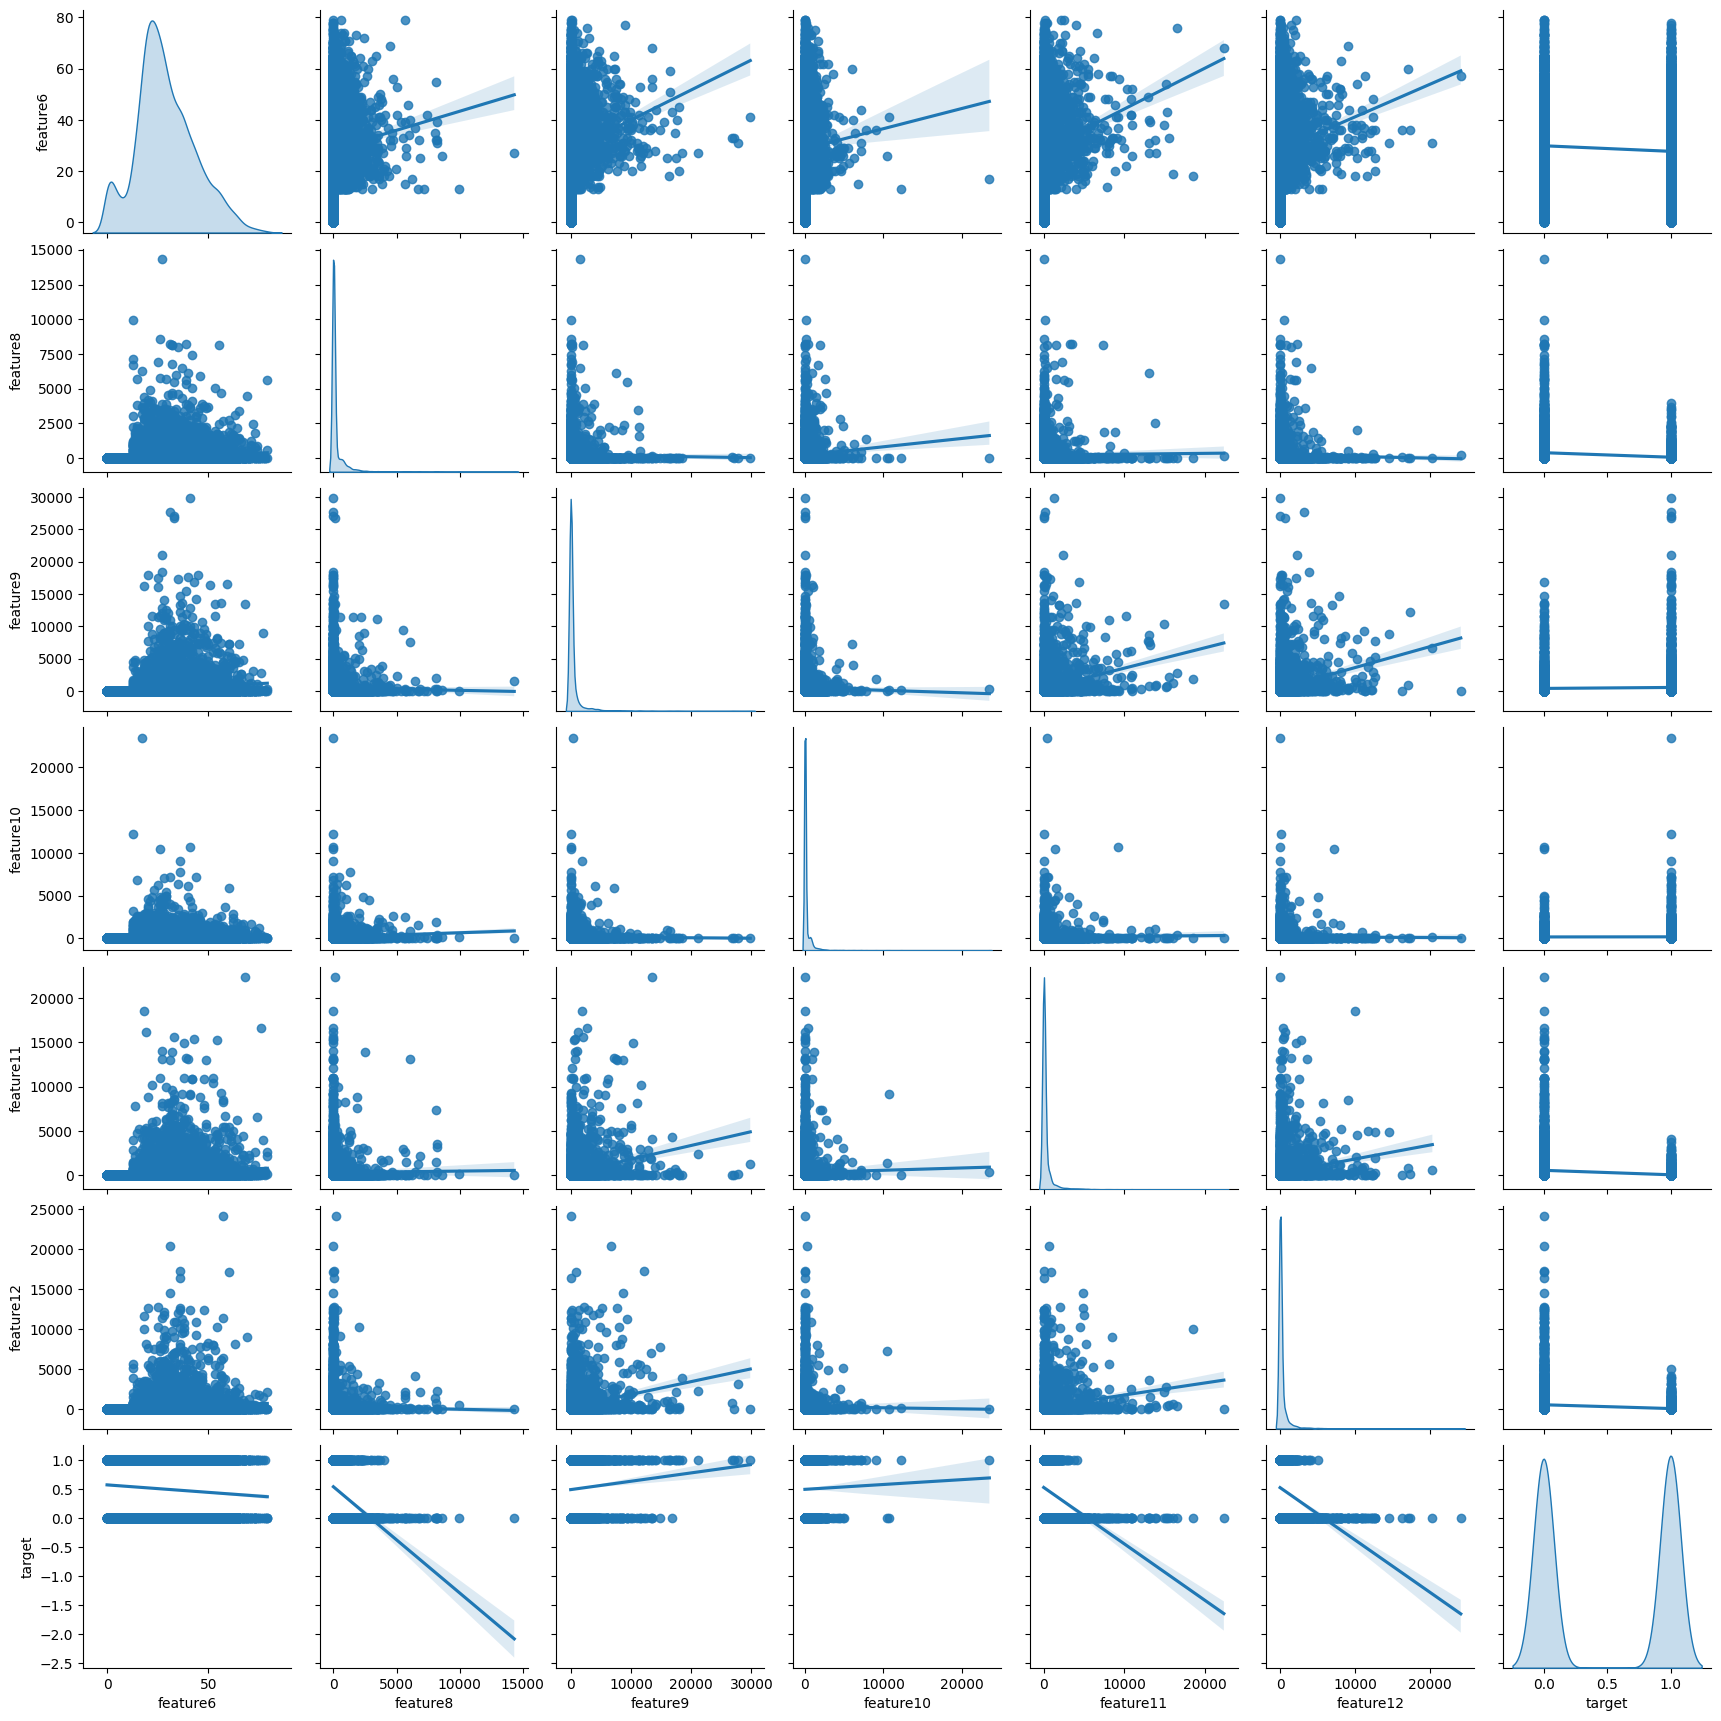

In [ ]:
sns.pairplot(train[col_pair],kind="reg", diag_kind = "kde")

- feature 6 is well distributed
- feature 8,9,10,11,12 are skewed; maybe a transformation here could help.

<ipython-input-51-27836ca86318>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train.feature8+1))


<Axes: xlabel='feature8', ylabel='Density'>

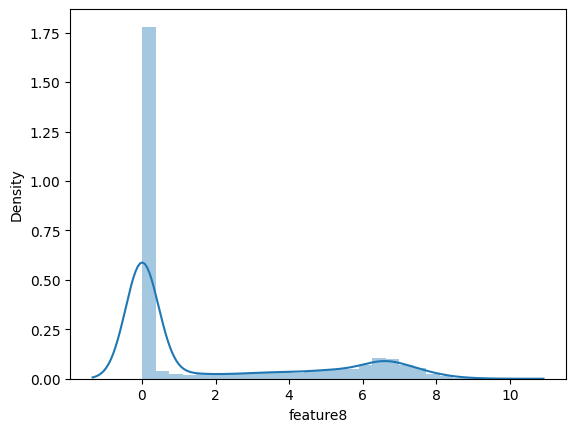

In [ ]:
sns.distplot(np.log(train.feature8+1))

In [ ]:
# Transformations

train['sqrt_8']=np.log(train.feature8+1)
train['sqrt_9']=np.log(train.feature9+1)
train['sqrt_10']=np.log(train.feature10+1)
train['sqrt_11']=np.log(train.feature11+1)
train['sqrt_12']=np.log(train.feature12+1)

test['sqrt_8']=np.log(test.feature8+1)
test['sqrt_9']=np.log(test.feature9+1)
test['sqrt_10']=np.log(test.feature10+1)
test['sqrt_11']=np.log(test.feature11+1)
test['sqrt_12']=np.log(test.feature12+1)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

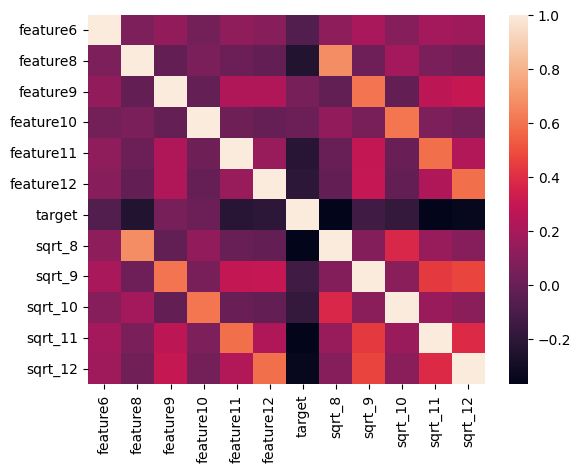

In [ ]:
traincorr = train.corr()
sns.heatmap(traincorr) #in termini di correlazione le trasformazioni sembrano funzionare

In [ ]:
train.describe()

,feature6,feature8,feature9,feature10,feature11,feature12,sqrt_8,sqrt_9,sqrt_10,sqrt_11,sqrt_12
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1.772195,1.947541,1.638622,1.878394,1.796809
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2.736122,2.950822,2.586336,2.785687,2.764405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,3.871201,4.343805,3.332205,4.094345,3.850148
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9.569971,10.302733,10.064458,10.017218,10.091377


### Outlier

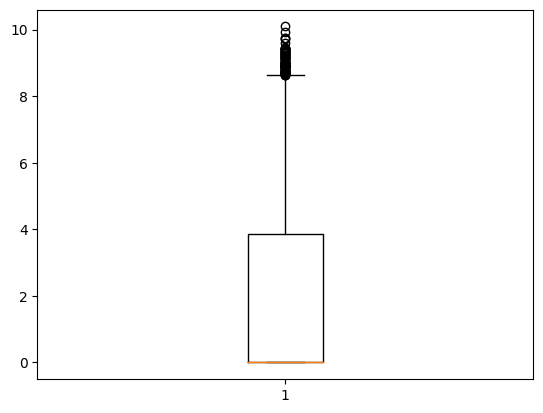

In [ ]:
box = plt.boxplot(train['sqrt_12'].dropna(),whis = [1, 99])
u = [item.get_ydata()[1] for item in box['whiskers']]
#there are some extreme points but (at least in transformed features), there is no far outlier, I will keep all observations for now for conservation sake

### Distributions in categorical data

In [ ]:
train.dtypes!='object'
for feature in train.columns[train.dtypes=='object']:
    if feature!='id':
        print('Train')
        print(train.groupby([feature])['id'].count())
        print('')

        print('Test')
        print(test.groupby([feature])['id'].count())  #also here same distributions
        print('')
        print('')


Train
feature1
A    2131
B    4602
C    1759
Name: id, dtype: int64

Test
feature1
A    1002
B    2263
C     925
Name: id, dtype: int64


Train
feature2
False    5439
True     3037
Name: id, dtype: int64

Test
feature2
False    2640
True     1544
Name: id, dtype: int64


Train
feature3
A/0/P     2
A/0/S     2
A/1/S     3
A/10/P    1
A/10/S    1
         ..
T/0/P     1
T/1/P     1
T/2/P     1
T/2/S     1
T/3/P     1
Name: id, Length: 6560, dtype: int64

Test
feature3
A/1/P      1
A/105/S    2
A/108/S    1
A/109/S    1
A/11/P     2
          ..
G/997/S    1
T/0/S      1
T/1/S      1
T/3/S      3
T/4/P      1
Name: id, Length: 3265, dtype: int64


Train
feature4
Bad        1800
Good       5915
Neutral     796
Name: id, dtype: int64

Test
feature4
Bad         841
Good       2956
Neutral     388
Name: id, dtype: int64


Train
feature7
False    8291
True      199
Name: id, dtype: int64

Test
feature7
False    4110
True       74
Name: id, dtype: int64




In [ ]:
train[['feature3_1','feature3_2','feature3_3']] = train['feature3'].str.split('/',expand=True)

test[['feature3_1','feature3_2','feature3_3']] = test['feature3'].str.split('/',expand=True)

In [ ]:
train.feature3_2.unique(),train.feature3_2.nunique()

(array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object), 1817)

In [ ]:
decili=np.quantile(train.feature3_2.astype(np.float).dropna(),[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])[::-1]
decili = np.delete(decili,[0])
train.loc[~train.feature3_2.isna(),'feature3_2_1']=10
test.loc[~test.feature3_2.isna(),'feature3_2_1']=10
val=9
for dec in decili:
    train.loc[train.feature3_2.astype(np.float)<=dec,'feature3_2_1']=val
    test.loc[test.feature3_2.astype(np.float)<=dec,'feature3_2_1']=val
    val-=1
train['feature3_2_1']=train['feature3_2_1'].astype(object)
test['feature3_2_1']=test['feature3_2_1'].astype(object)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

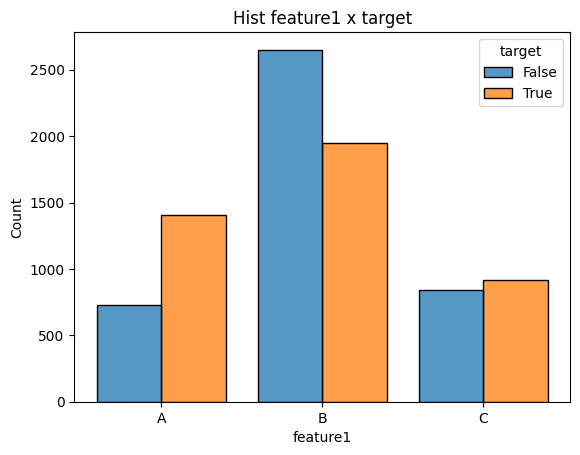

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


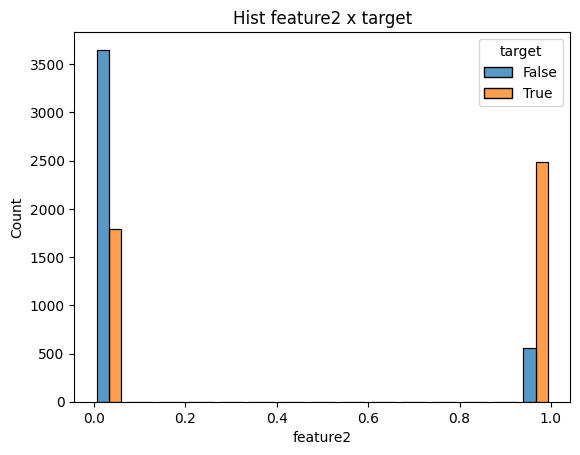

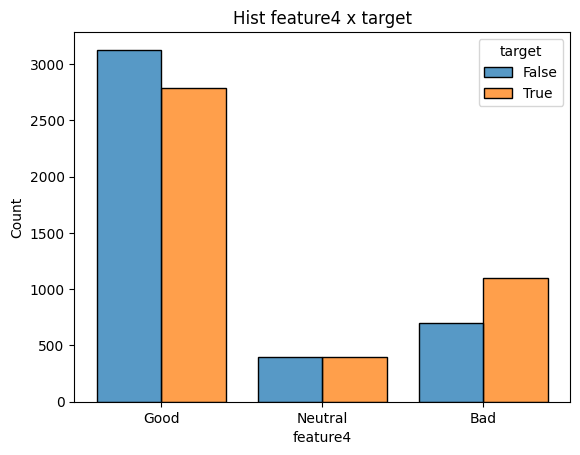

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


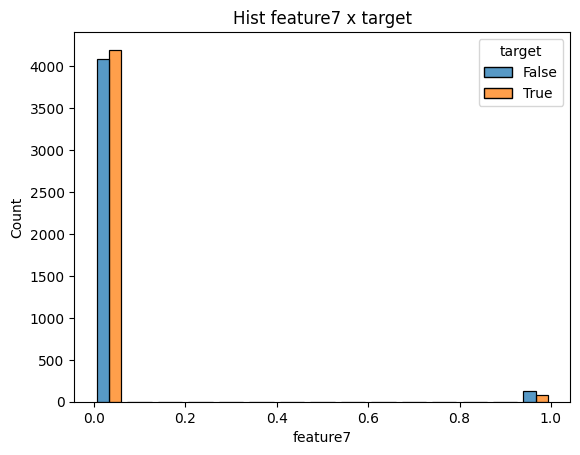

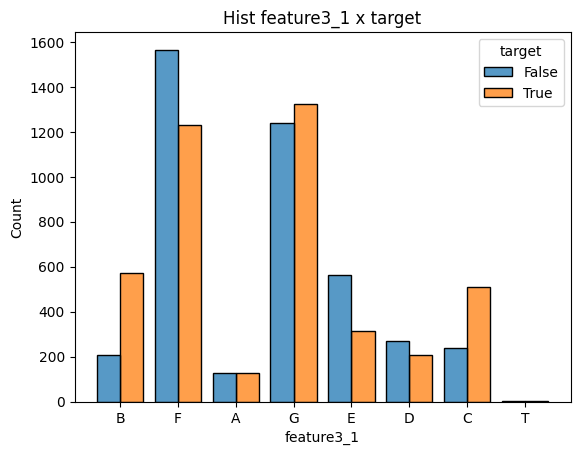

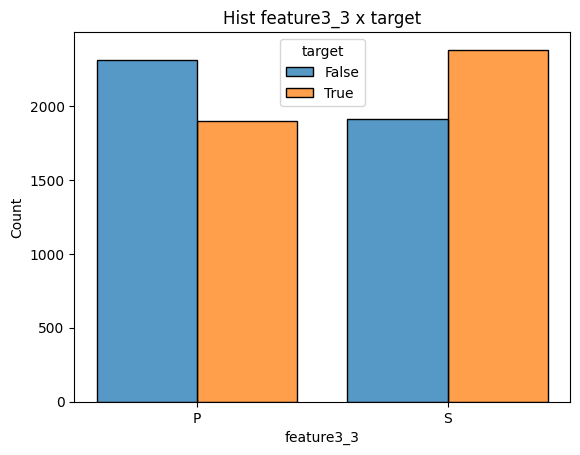

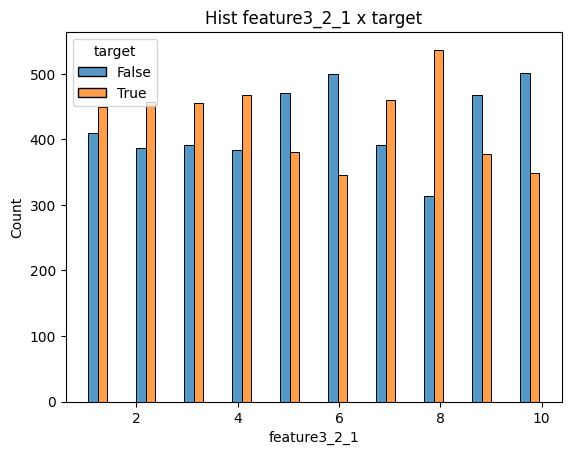

In [ ]:
cat_feat=['feature1', 'feature2', 'feature4',
          'feature7','feature3_1', 'feature3_3', 'feature3_2_1']

for feature in cat_feat:
    plt.figure()
    sns.histplot(data=train[~train[feature].isna()], x=feature, hue='target', multiple='dodge',shrink=.8)
    plt.title('Hist {} x target'.format(feature))
    plt.show()



In [ ]:
for feature in ['feature3_1','feature3_3','feature3_2_1']:
    if feature!='id':
        print('Train')
        print(train.groupby([feature])['id'].count())
        print('')

        print('Test')
        print(test.groupby([feature])['id'].count())  #also here same distributions
        print('')
        print('')

Train
feature3_1
A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
Name: id, dtype: int64

Test
feature3_1
A      98
B     362
C     355
D     242
E     447
F    1445
G    1222
T       6
Name: id, dtype: int64


Train
feature3_3
P    4206
S    4288
Name: id, dtype: int64

Test
feature3_3
P    2084
S    2093
Name: id, dtype: int64


Train
feature3_2_1
1.0     859
2.0     844
3.0     846
4.0     851
5.0     850
6.0     846
7.0     851
8.0     851
9.0     846
10.0    850
Name: id, dtype: int64

Test
feature3_2_1
1.0     445
2.0     373
3.0     385
4.0     395
5.0     461
6.0     424
7.0     417
8.0     399
9.0     452
10.0    426
Name: id, dtype: int64




In [ ]:
train.head()

,id,feature1,feature2,feature3,feature4,feature6,feature7,feature8,feature9,feature10,feature11,feature12,target,sqrt_8,sqrt_9,sqrt_10,sqrt_11,sqrt_12,feature3_1,feature3_2,feature3_3,feature3_2_1
0,0001_01,A,False,B/0/P,Good,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,B,0,P,1.0
1,0002_01,B,False,F/0/S,Good,24.0,False,109.0,9.0,25.0,549.0,44.0,True,4.700480,2.302585,3.258097,6.309918,3.806662,F,0,S,1.0
2,0003_01,A,False,A/0/S,Good,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3.784190,8.182280,0.000000,8.812248,3.912023,A,0,S,1.0
3,0003_02,A,False,A/0/S,Good,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,A,0,S,1.0
4,0004_01,B,False,F/1/S,Good,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5.717028,4.262680,5.023881,6.338594,1.098612,F,1,S,1.0


### Missing

In [ ]:
cat_feat=['feature1', 'feature2', 'feature4',
          'feature7','feature3_1', 'feature3_3', 'feature3_2_1']

num_feat=['feature6', 'feature8', 'feature9', 'feature10', 'feature11',
          'feature12', 'sqrt_8', 'sqrt_9', 'sqrt_10', 'sqrt_11', 'sqrt_12']

train[cat_feat+num_feat].isna().sum(),test[cat_feat+num_feat].isna().sum()

(feature1        201
 feature2        217
 feature4        182
 feature7        203
 feature3_1      199
 feature3_3      199
 feature3_2_1    199
 feature6        179
 feature8        181
 feature9        183
 feature10       208
 feature11       183
 feature12       188
 sqrt_8          181
 sqrt_9          183
 sqrt_10         208
 sqrt_11         183
 sqrt_12         188
 dtype: int64,
 feature1         87
 feature2         93
 feature4         92
 feature7         93
 feature3_1      100
 feature3_3      100
 feature3_2_1    100
 feature6         91
 feature8         82
 feature9        106
 feature10        98
 feature11       101
 feature12        80
 sqrt_8           82
 sqrt_9          106
 sqrt_10          98
 sqrt_11         101
 sqrt_12          80
 dtype: int64)

In [ ]:
# sembrano esserci veramente poche osservazioni con feature3_1=='T', metto a missing per imputarle
train.loc[train['feature3_1']=='T', 'feature3_1']=None
train.loc[train['feature3_1'].isna(), 'feature3_1']

test.loc[test['feature3_1']=='T', 'feature3_1']=None
test.loc[test['feature3_1'].isna(), 'feature3_1']

18      NaN
99      NaN
135     NaN
147     NaN
180     NaN
       ... 
4209    NaN
4248    NaN
4249    NaN
4258    NaN
4273    NaN
Name: feature3_1, Length: 106, dtype: object

In [ ]:
# give mean and mode as missing
for feat in cat_feat+num_feat:
    if feat in cat_feat:
        train.loc[train[feat].isna(), feat]=train[feat].mode()[0]
        test.loc[test[feat].isna(), feat]=train[feat].mode()[0]
    else:
        train.loc[train[feat].isna(), feat]=train[feat].median()
        test.loc[test[feat].isna(), feat]=train[feat].median()

In [ ]:
train.head()

,id,feature1,feature2,feature3,feature4,feature6,feature7,feature8,feature9,feature10,feature11,feature12,target,sqrt_8,sqrt_9,sqrt_10,sqrt_11,sqrt_12,feature3_1,feature3_2,feature3_3,feature3_2_1
0,0001_01,A,False,B/0/P,Good,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,B,0,P,1.0
1,0002_01,B,False,F/0/S,Good,24.0,False,109.0,9.0,25.0,549.0,44.0,True,4.700480,2.302585,3.258097,6.309918,3.806662,F,0,S,1.0
2,0003_01,A,False,A/0/S,Good,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3.784190,8.182280,0.000000,8.812248,3.912023,A,0,S,1.0
3,0003_02,A,False,A/0/S,Good,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,A,0,S,1.0
4,0004_01,B,False,F/1/S,Good,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5.717028,4.262680,5.023881,6.338594,1.098612,F,1,S,1.0


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#cat_feat=['feature1', 'feature2', 'feature4',
#          'feature7','feature3_1', 'feature3_3', 'feature3_2_1']

#num_feat=['feature6', 'feature8', 'feature9', 'feature10', 'feature11',
#          'feature12', 'sqrt_8', 'sqrt_9', 'sqrt_10', 'sqrt_11', 'sqrt_12']

#for col in cat_feat:
#    lab_enc = LabelEncoder().fit(train1[col][train1[col].notnull()])
#    train1[col][train1[col].notnull()] = lab_enc.transform(train1[col][train1[col].notnull()])


#imp_num = IterativeImputer(estimator=RandomForestRegressor(),
#                            initial_strategy='mean',
#                            max_iter=10, random_state=0)
#imp_cat = IterativeImputer(estimator=RandomForestClassifier(),
#                            initial_strategy='most_frequent',
#                            max_iter=10, random_state=0)
#imp_num.fit(train1[num_feat])
#imp_cat.fit(train1[cat_feat])


#train1[num_feat] = imp_num.transform(train1[num_feat])
#train1[cat_feat] = imp_cat.transform(train1[cat_feat])


In [ ]:
train[cat_feat+num_feat].isna().sum(),test[cat_feat+num_feat].isna().sum()

(feature1        0
 feature2        0
 feature4        0
 feature7        0
 feature3_1      0
 feature3_3      0
 feature3_2_1    0
 feature6        0
 feature8        0
 feature9        0
 feature10       0
 feature11       0
 feature12       0
 sqrt_8          0
 sqrt_9          0
 sqrt_10         0
 sqrt_11         0
 sqrt_12         0
 dtype: int64,
 feature1        0
 feature2        0
 feature4        0
 feature7        0
 feature3_1      0
 feature3_3      0
 feature3_2_1    0
 feature6        0
 feature8        0
 feature9        0
 feature10       0
 feature11       0
 feature12       0
 sqrt_8          0
 sqrt_9          0
 sqrt_10         0
 sqrt_11         0
 sqrt_12         0
 dtype: int64)

### One hot encoder

In [ ]:
ohe = OneHotEncoder(sparse=False)
categorical_train = ohe.fit_transform(train[cat_feat])
categorical_train = pd.DataFrame(categorical_train,columns = ohe.get_feature_names_out())

categorical_test = ohe.fit_transform(test[cat_feat])
categorical_test = pd.DataFrame(categorical_test,columns = ohe.get_feature_names_out())



`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(train[num_feat])
numerical_train= pd.DataFrame(scaled,columns=num_feat)

#tests says scaling does not help, for interpretation purposise I will keep original scale

# Model

In [ ]:
# Define X, y

X = pd.concat([train[num_feat],categorical_train],axis=1)
y = train['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### feature selection


In [ ]:
!pip install Boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.7 MB/s eta 0:00:00


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train, y_train)

feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	23
Tentative: 	2
Rejected: 	15
Iteration: 	9 / 100
Confirmed: 	23
Tentative: 	2
Rejected: 	15
Iteration: 	10 / 100
Confirmed: 	23
Tentative: 	2
Rejected: 	15
Iteration: 	11 / 100
Confirmed: 	23
Tentative: 	2
Rejected: 	15
Iteration: 	12 / 100
Confirmed: 	23
Tentative: 	2
Rejected: 	15
Iteration: 	13 / 100
Confirmed: 	23
Tentative: 	2
Rejected: 	15
Iteration: 	14 / 100
Confirmed: 	23
Tentative: 	2
Rejected: 	15
Iteration: 	15 / 100
Confirmed: 	23
Tentative: 	2
Rejected: 	15
Iteration: 	16 / 100
Confirmed: 	23
Tentative: 	2
Reject

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=141, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FD167AF9040),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FD167AF9040, verbose=2)

In [ ]:
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X_train.columns[i])
    else:
        print("Doesn't pass the test: ", X_train.columns[i])


------Support and Ranking for each feature------
Passes the test:  feature6
Passes the test:  feature8
Passes the test:  feature9
Passes the test:  feature10
Passes the test:  feature11
Passes the test:  feature12
Passes the test:  sqrt_8
Passes the test:  sqrt_9
Passes the test:  sqrt_10
Passes the test:  sqrt_11
Passes the test:  sqrt_12
Passes the test:  feature1_A
Passes the test:  feature1_B
Passes the test:  feature1_C
Passes the test:  feature2_False
Passes the test:  feature2_True
Passes the test:  feature4_Bad
Doesn't pass the test:  feature4_Good
Doesn't pass the test:  feature4_Neutral
Doesn't pass the test:  feature7_False
Doesn't pass the test:  feature7_True
Doesn't pass the test:  feature3_1_A
Passes the test:  feature3_1_B
Passes the test:  feature3_1_C
Doesn't pass the test:  feature3_1_D
Passes the test:  feature3_1_E
Passes the test:  feature3_1_F
Passes the test:  feature3_1_G
Passes the test:  feature3_3_P
Passes the test:  feature3_3_S
Doesn't pass the test:  fea

In [ ]:
X_train_filtered = X_train.loc[:,feat_selector.support_]
X_test_filtered = X_test.loc[:,feat_selector.support_]


In [ ]:
X_train_filtered.head()

,feature6,feature8,feature9,feature10,feature11,feature12,sqrt_8,sqrt_9,sqrt_10,sqrt_11,sqrt_12,feature1_A,feature1_B,feature1_C,feature2_False,feature2_True,feature4_Bad,feature3_1_B,feature3_1_C,feature3_1_E,feature3_1_F,feature3_1_G,feature3_3_P,feature3_3_S,feature3_2_1_8.0
4696,35.0,1337.0,49.0,57.0,0.0,0.0,7.198931,3.912023,4.060443,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5946,28.0,0.0,152.0,215.0,30.0,510.0,0.000000,5.030438,5.375278,3.433987,6.236370,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
227,43.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3950,65.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7674,18.0,0.0,0.0,19.0,751.0,4.0,0.000000,0.000000,2.995732,6.622736,1.609438,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=2000)
model_lr.fit(X_train_filtered, y_train)


print('auc: {}'.format(roc_auc_score(y_test, model_lr.predict_proba(X_test_filtered)[:,1])))
print('accuracy: {}'.format(accuracy_score(y_test, model_lr.predict(X_test_filtered))))


auc: 0.8796669064188796
accuracy: 0.7894736842105263


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_filtered, y_train)

print('auc: {}'.format(roc_auc_score(y_test, model_dt.predict_proba(X_test_filtered)[:,1])))
print('accuracy: {}'.format(accuracy_score(y_test, model_dt.predict(X_test_filtered))))


auc: 0.7707357315034407
accuracy: 0.7476472638550018


In [ ]:
import xgboost as xgb

model_xgb = xgb_cl = xgb.XGBClassifier()
model_xgb.fit(X_train_filtered,y_train)

print('auc: {}'.format(roc_auc_score(y_test, model_xgb.predict_proba(X_test_filtered)[:,1])))
print('accuracy: {}'.format(accuracy_score(y_test, model_xgb.predict(X_test_filtered))))


auc: 0.8865946114070214
accuracy: 0.7967933077727432


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_filtered, y_train)

print('auc: {}'.format(roc_auc_score(y_test, model_rf.predict_proba(X_test_filtered)[:,1])))
print('accuracy: {}'.format(accuracy_score(y_test, model_rf.predict(X_test_filtered))))


auc: 0.8646988355818201
accuracy: 0.786336702683862


## Parameter tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# let's check if with some parameter tuning we can slightly improve performancies
pipeline = Pipeline([
                     ('model',xgb.XGBClassifier())
])

search = GridSearchCV(pipeline,
                      {'model__eta':np.arange(0.05,0.3,0.025),
                       'model__subsample':np.arange(0.5,1,0.1),
                       'model__max_depth':[2,4,5,6]
                       },
                      cv = 3, scoring='roc_auc',verbose=1
                      )

search.fit(X_train_filtered,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'model__eta': array([0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 ,
       0.275]),
                         'model__max_depth': [2, 4, 5, 6],
                         'model__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='roc_auc', verbose=1)

In [ ]:
search.best_params_

{'model__eta': 0.07500000000000001,
 'model__max_depth': 4,
 'model__subsample': 0.7}

In [ ]:
best_mod=search.best_estimator_

print('auc: {}'.format(roc_auc_score(y_test, best_mod.predict_proba(X_test_filtered)[:,1])))
print('accuracy: {}'.format(accuracy_score(y_test, best_mod.predict(X_test_filtered))))


auc: 0.89187531588974
accuracy: 0.7950505402579295


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
approx_best = xgb.XGBClassifier(eta= 0.07500000000000001,max_depth=4,subsample=0.7)
approx_best.fit(X_train_filtered,y_train)

print('auc: {}'.format(roc_auc_score(y_test, approx_best.predict_proba(X_test_filtered)[:,1])))
print('accuracy: {}'.format(accuracy_score(y_test, approx_best.predict(X_test_filtered))))


auc: 0.89187531588974
accuracy: 0.7950505402579295


In [ ]:
import shap
explainer = shap.TreeExplainer(approx_best)
shap_values = explainer.shap_values(X_test_filtered)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


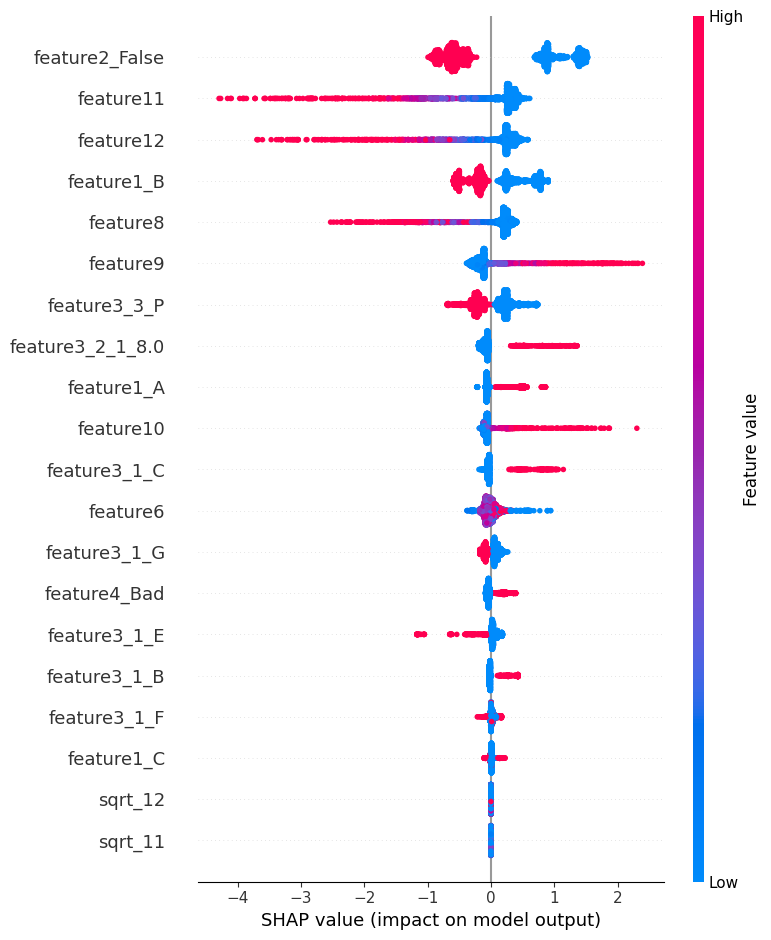

In [ ]:
shap.summary_plot(shap_values, X_test_filtered)

## Predict on test

In [ ]:
xgb_pred = xgb.XGBClassifier(eta= 0.075,max_depth=4,subsample=0.7)
xgb_pred.fit(X,y)

X_Test = pd.concat([test[num_feat],categorical_test],axis=1)

predictions=xgb_pred.predict(X_Test)

In [ ]:
predictions.sum()/len(predictions)

0.5365910685059622

In [ ]:
y.sum()/len(y)

0.5036236051995858